In [2]:
# import packages
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import matplotlib
import cartopy.crs as ccrs
import cartopy
from pathlib import Path
import glob
import os
import shutil
import geopandas as gpd

In [3]:
work_dir=Path("/mnt/u/LSM root zone/")

In [59]:
u = pd.read_csv(f'{work_dir}/global_sr_data/us/CAMELS/us_camels_attributes.csv',index_col=0)
uids = u.index
np.savetxt(f'{work_dir}/global_sr/output/us_camels_ids.txt',uids,fmt='%s')

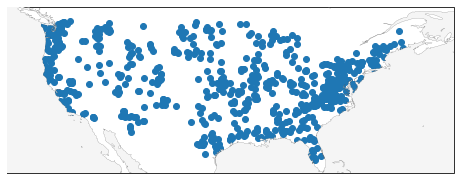

In [11]:
lat_min,lat_max= 25,51
lon_min,lon_max= -130,-60
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.001)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.12)
ax.set_global()
ax.set_xlim(lon_min,lon_max)
ax.set_ylim(lat_min,lat_max)
s = ax.scatter(u.gauge_lon,u.gauge_lat)


In [26]:
# copy q p ep t timeseries to global_sr folders
c_list=[]
for filepath in glob.iglob(f'{work_dir}/global_sr_data/us/q_p_ep_timeseries/individual_catchments/*.csv'):
    f = os.path.split(filepath)[1] # remove full path
    a = pd.read_csv(filepath,index_col=0)
    a = a.rename(columns={'q_camels':'Q','p_gswp':'p','t_gswp':'tas','ep_gleam':'ep'})
    q = a['Q']
    q.to_csv(f'{work_dir}/global_sr/output/q_timeseries_selected/{f[:-4]}.csv')
    
    b = a[['p','tas','ep']]
    b.to_csv(f'{work_dir}/global_sr/output/forcing_timeseries/processed/daily/{f[:-4]}_1981_2010.csv')


In [155]:
# add areas to area.csv
area = pd.read_csv(f'{work_dir}/global_sr/output/catchment_area.csv',index_col=0)
u = pd.read_csv(f'{work_dir}/global_sr_data/us/CAMELS/us_camels_attributes.csv',index_col=0)
u = u.rename(columns={'area_gages2':'area'})
# u = u['area']
ids = np.concatenate([u.index,area.index])
a = pd.DataFrame(index=ids, columns=['area'])
a.loc[u.index,'area'] = u.area.values
a.loc[area.index,'area'] = area.area.values
a.to_csv(f'{work_dir}/global_sr/output/catchment_area2.csv')

In [57]:
# shapes
s = gpd.read_file(f'{work_dir}/global_sr_data/catchment_shapes/HCDN_nhru_final_671.shp')
for i in range(len(s)):
    ss = s.iloc[i]
    sid = ss.hru_id
    b = gpd.GeoSeries(ss.geometry)
    b.to_file(f'{work_dir}/global_sr_data/us/individual_shapes/{sid}.shp')

In [29]:
# treecover
t = pd.read_csv(f'{work_dir}/global_sr/output/treecover/gsim_shapes_treecover_italy.csv',index_col=0)
utc = pd.read_csv(f'{work_dir}/global_sr_data/google_earth_engine/tree_cover_csv/us_tree_nontree_cover.csv',index_col=0)
utc = utc.rename(columns={'non_veg':'mean_nonveg'})
t = t[:-1342]
tt = pd.concat([t,utc])
# tt = tt.drop(columns='non_veg')
tt.to_csv(f'{work_dir}/global_sr/output/treecover/gsim_shapes_treecover_italy.csv')

In [73]:
# soiltypes
c1 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/processed/carb.csv',index_col=0)
c2 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/ee_output/carb_shp_us.csv',index_col=0)
c2.index = c2.hru_id
c2 = c2[['max','mean','median','min']]
c = pd.concat([c1,c2])
c.to_csv(f'{work_dir}/global_sr/output/soil_types/processed/carb.csv')

c1 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/processed/clay.csv',index_col=0)
c2 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/ee_output/clay_shp_us.csv',index_col=0)
c2.index = c2.hru_id
c2 = c2[['max','mean','median','min']]
c = pd.concat([c1,c2])
c.to_csv(f'{work_dir}/global_sr/output/soil_types/processed/clay.csv')

c1 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/processed/sand.csv',index_col=0)
c2 = pd.read_csv(f'{work_dir}/global_sr/output/soil_types/ee_output/sand_shp_us.csv',index_col=0)
c2.index = c2.hru_id
c2 = c2[['max','mean','median','min']]
c = pd.concat([c1,c2])
c.to_csv(f'{work_dir}/global_sr/output/soil_types/processed/sand.csv')

In [111]:
# lat lon
e = pd.read_csv(f'{work_dir}/global_sr/output/lat_lon_catchment_outlets.csv', index_col=0)
u = pd.read_csv(f'{work_dir}/global_sr_data/us/CAMELS/us_camels_attributes.csv',index_col=0)
u = u.rename(columns={'gauge_lon':'lon','gauge_lat':'lat'})
u = u[['lat','lon']]
a = pd.concat([e,u])
a.to_csv(f'{work_dir}/global_sr/output/lat_lon_catchment_outlets.csv')